In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk("GiveMeSomeCredit/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

GiveMeSomeCredit/cs-test.csv
GiveMeSomeCredit/cs-training.csv
GiveMeSomeCredit/Data Dictionary.xls
GiveMeSomeCredit/sampleEntry.csv


In [2]:
data = pd.read_csv("GiveMeSomeCredit/cs-training.csv")

In [3]:
list(data)

['Unnamed: 0',
 'SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

## Analise de dados desbalanceados


In [4]:
data.SeriousDlqin2yrs.mean()

0.06684

In [5]:
data.shape

(150000, 12)

In [6]:
data.dropna(inplace=True)

In [7]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


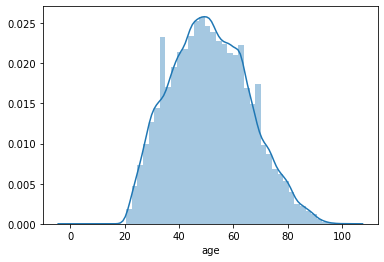

In [8]:
sns.distplot(data["age"])

Text(0.5, 1.0, 'SeriousDlqin2yrs = 1')

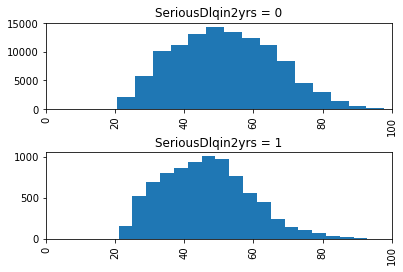

In [9]:
age_hist = data['age'].hist(
    by=data['SeriousDlqin2yrs'], bins=20, layout=(2, 1))
age_hist[0].set_xlim((0, 100))
age_hist[0].set_title('SeriousDlqin2yrs = 0')
age_hist[1].set_xlim((0, 100))
age_hist[1].set_title('SeriousDlqin2yrs = 1')


## Analise e tratamento de dados nulos


In [10]:
print(data.isnull().sum())


Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [11]:
data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,75026.012514,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,43286.029117,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37678.000000,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,74969.000000,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112494.000000,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,150000.000000,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [12]:
data["MonthlyIncome"].fillna(data["MonthlyIncome"].mean(), inplace=True)
data["NumberOfDependents"].fillna(data["NumberOfDependents"].mode()[0], inplace=True)

In [13]:
print(data.isnull().sum())

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


## Seleção de Variaveis com maior correlação com variavel resposta


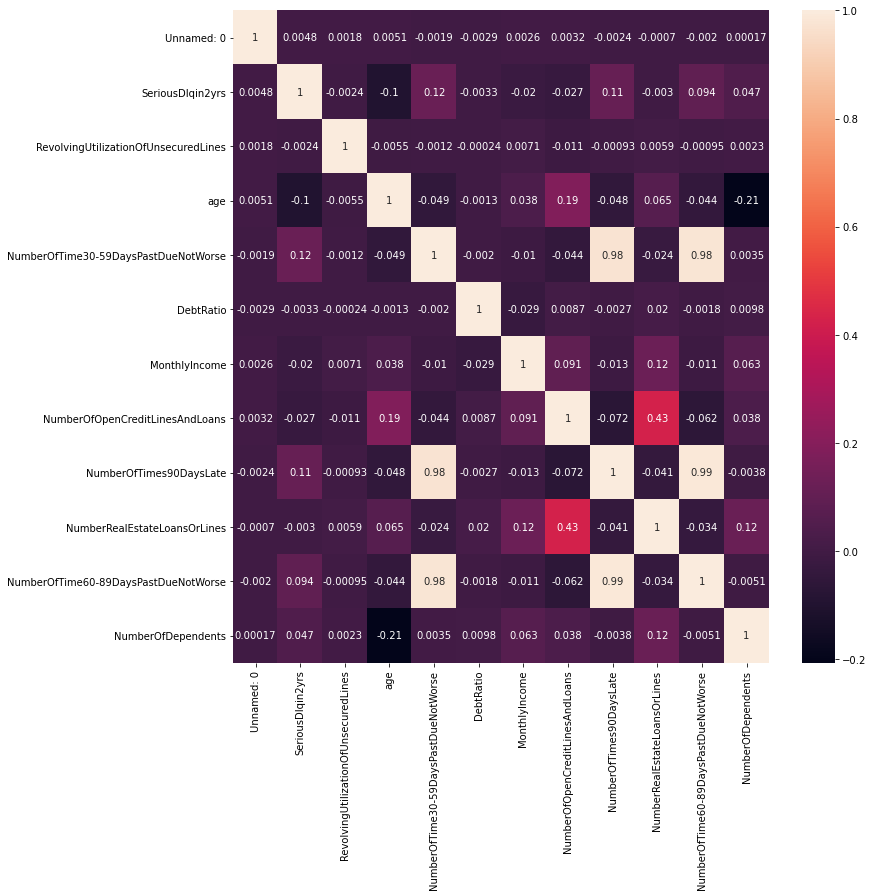

In [14]:
cor = data.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True, ax=ax)

In [15]:
# Find most important features relative to target Price
print("Find most important features relative to Attrition-target")
corr = data.corr()
corr.sort_values(["SeriousDlqin2yrs"], ascending=False, inplace=True)
print(corr.SeriousDlqin2yrs)

Find most important features relative to Attrition-target
SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.123159
NumberOfTimes90DaysLate                 0.111149
NumberOfTime60-89DaysPastDueNotWorse    0.093836
NumberOfDependents                      0.046704
Unnamed: 0                              0.004781
RevolvingUtilizationOfUnsecuredLines   -0.002386
NumberRealEstateLoansOrLines           -0.003005
DebtRatio                              -0.003291
MonthlyIncome                          -0.019746
NumberOfOpenCreditLinesAndLoans        -0.027445
age                                    -0.102685
Name: SeriousDlqin2yrs, dtype: float64


## Divisão dos dados em train & test


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

attributes = [
    "RevolvingUtilizationOfUnsecuredLines",
    "age",
    "NumberOfTime30-59DaysPastDueNotWorse",
    "DebtRatio",
    "MonthlyIncome",
    "NumberOfDependents",
]
sol = ["SeriousDlqin2yrs"]
X = data[attributes]
y = data[sol]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
# pred
data_test = pd.read_csv("GiveMeSomeCredit/cs-test.csv")
print(data_test.isnull().sum())

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64


In [18]:
data_test["MonthlyIncome"].fillna(data_test["MonthlyIncome"].mean(), inplace=True)
data_test["NumberOfDependents"].fillna(
    data_test["NumberOfDependents"].mode()[0], inplace=True
)
X_pred = data_test[attributes]
y_pred = data_test[sol]

In [19]:
print(data_test.isnull().sum())

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64


## Logistic Regression


In [20]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression(C=0.8, random_state=0)

lrg.fit(X_train, y_train.values.ravel())
preds = lrg.predict(X_test)

print("ACC: ", accuracy_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Roc: ", roc_auc_score(y_test, preds))
print("sqrt: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Confusion matrix:\n", pd.DataFrame(confusion_matrix(y_test, preds)))

ACC:  0.9323466644494333
Recall:  0.01141459437423563
Precision:  0.6363636363636364
Roc:  0.5054694001965148
sqrt:  0.2601025481431637
Confusion matrix:
        0   1
0  33612  16
1   2425  28


## Randon Forest


In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0, n_estimators=100, min_samples_leaf=5)

rfc.fit(X_train, y_train.values.ravel())
preds = rfc.predict(X_test)

print("ACC: ", accuracy_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Roc: ", roc_auc_score(y_test, preds))
print("sqrt: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Confusion matrix:\n", pd.DataFrame(confusion_matrix(y_test, preds)))

ACC:  0.9330395499016103
Recall:  0.08683245006114962
Precision:  0.5475578406169666
Roc:  0.5407993581339411
sqrt:  0.25876717353325507
Confusion matrix:
        0    1
0  33452  176
1   2240  213


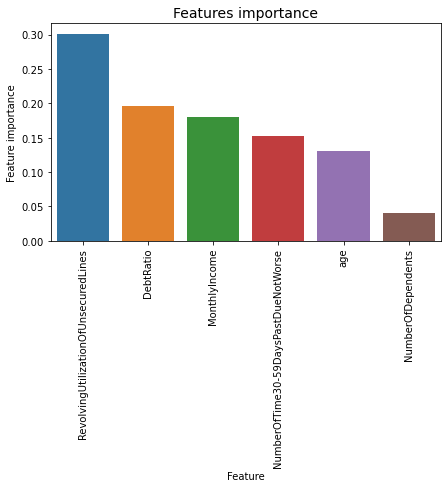

In [22]:
tmp = pd.DataFrame(
    {"Feature": attributes, "Feature importance": rfc.feature_importances_}
)
tmp = tmp.sort_values(by="Feature importance", ascending=False)
plt.figure(figsize=(7, 4))
plt.title("Features importance", fontsize=14)
s = sns.barplot(x="Feature", y="Feature importance", data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

## Xgboost


In [23]:
import xgboost as xgb

xg_reg = xgb.XGBClassifier(max_depth=5, n_estimators=100)

xg_reg.fit(X_train, y_train.values.ravel())
preds = xg_reg.predict(X_test)

print("ACC: ", accuracy_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Roc: ", roc_auc_score(y_test, preds))
print("sqrt: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Confusion matrix:\n", pd.DataFrame(confusion_matrix(y_test, preds)))

ACC:  0.9319032177600399
Recall:  0.09743171626579698
Precision:  0.495850622406639
Roc:  0.5451027975881144
sqrt:  0.260953601699536
Confusion matrix:
        0    1
0  33385  243
1   2214  239


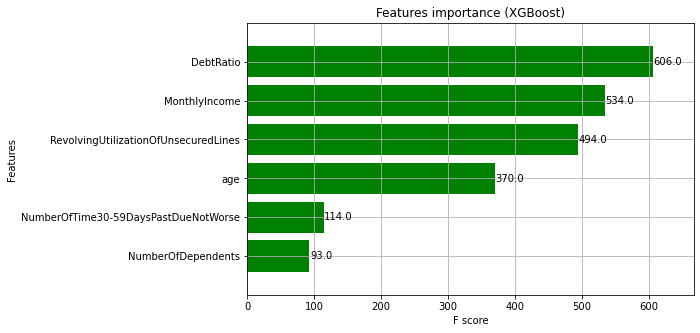

In [24]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8, 5))
xgb.plot_importance(
    xg_reg, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green"
)
plt.show()

## Lightgbm


In [25]:
import lightgbm as lgb

lgb_reg = lgb.LGBMClassifier(max_depth=5, n_estimators=100)

lgb_reg.fit(X_train, y_train.values.ravel())
preds = lgb_reg.predict(X_test)

print("ACC: ", accuracy_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Roc: ", roc_auc_score(y_test, preds))
print("sqrt: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Confusion matrix:\n", pd.DataFrame(confusion_matrix(y_test, preds)))

ACC:  0.9332058424101327
Recall:  0.08846310640032613
Precision:  0.5549872122762148
Roc:  0.5416444234273546
sqrt:  0.25844565693752186
Confusion matrix:
        0    1
0  33454  174
1   2236  217


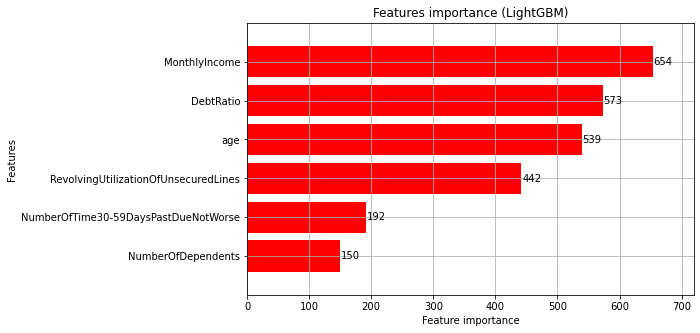

In [26]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8, 5))
lgb.plot_importance(
    lgb_reg, height=0.8, title="Features importance (LightGBM)", ax=ax, color="red"
)
plt.show()